# Lecture 5. Q-Learning in non-deterministic world

Stochastic(Nondeterministic) = Action을 했을때 항상 똑같은 State와 Reward가 오는것이 아님.
Deterministic : 특정 State에서 어떤 action을 했을때 항상 같은 State와 Reward가 반환 됨.

Stochastic (non-deterministic) world
- solution?  
    Listen to Q(s') (just a little bit)  
    Update Q(s) little bit (learning rate)  
- Like our life mentors  
    Don't just listen and follow one mentor  
    Need to listen from many mentors  

Stochastic하기 때문에 Q'의 값을 줄여서 반영함(little bit 의견) using alpha
Q^(hat)(s, a) <- (1 - alpha)Q^(hat)(s, a) + alpha[r + gamma\*max\*Q^(hat)(s', a')]


In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
#import readchar

LEFT = 0
DOWN = 1
RIGHT = 2
UP = 3

arrow_keys = {
    '\x1b[A': UP,
    '\x1b[B': DOWN,
    '\x1b[C': RIGHT,
    '\x1b[D': LEFT
}

register(
    id='FrozenLake-v3',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name': '4x4', 
            'is_slippery': False}
)

In [2]:
env = gym.make('FrozenLake-v0')
#env.render()

/Users/taejunhwang/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [7]:

Q = np.zeros([env.observation_space.n, env.action_space.n])

learning_rate = 0.85
dis = 0.99
num_episodes = 2000

rList = []

for i in range(num_episodes):
    state = env.reset()
    rAll = 0
    done = False
    
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))
        
        new_state, reward, done, _ = env.step(action)
        
        Q[state, action] = (1-learning_rate)*Q[state, action] + learning_rate*(reward + dis * np.max(Q[new_state, :]))
        
        rAll += reward
        state = new_state
        
    rList.append(rAll)

Success rate: 0.5
Final Q-Table Values
[[1.48819449e-01 0.00000000e+00 4.79613481e-03 5.58661906e-03]
 [0.00000000e+00 4.80008223e-03 0.00000000e+00 4.15455409e-01]
 [1.56177920e-01 0.00000000e+00 0.00000000e+00 5.97745704e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.91794008e-02 5.20922756e-04 3.76232808e-03 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.11897652e-04 2.18290001e-05 1.64899944e-05 5.17245263e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.30451450e-04 5.41730942e-04 6.98261498e-04 3.42784482e-02]
 [0.00000000e+00 5.12983768e-01 7.17257757e-04 0.00000000e+00]
 [5.04706918e-02 8.83253337e-05 0.00000000e+00 1.94848185e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 2.54490172e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.57574814e-01 0.00000000e+00]
 [0.00000000e+00

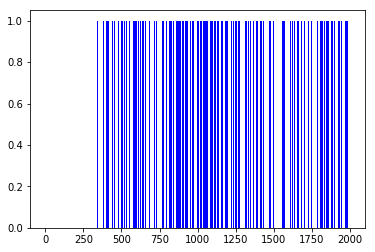

In [8]:
import matplotlib.pyplot as plt

print("Success rate: " + str(sum(rList)/num_episodes))
print("Final Q-Table Values")
print(Q)
plt.bar(range(len(rList)), rList, color="blue")
plt.show()

Stochastic한 환경에서는 Learning Rate가 없이 할 경우 Q-Function을 신뢰하고 Update할 수 없게된다.
- action을 취했지만 결과가 다르기 때문, 결과가 다르다는 것은 원하는 기대값을 받지 못한다는 것이고 해당 값으로 Update하면 안된다.

따라서 Learning Rate를 적용하여 Q-Function에 의해 Update되는 값의 비중을 조절하여 Optimal한 값을 찾는다.
